# Modelo de regresion con RandomForest aplicado al sector bien raiz para predecir el precio de las casas.

## Autor: Mateo Londoño Rúa  [LinkedIn](https://www.linkedin.com/in/mateo-londono-rua117/)

En el presente proyecto, vamos a desarrollar un modelo con el fin de predecir  el valor de una casa en Montreal, Canadá. Para eso, vamos a utilizar un dataset y estas son algunas de las variables: 

* **LotFrontage**: Metros de frente del terreno de la propiedad.
* **LotArea**: Área total del terreno en metros cuadrados.
* **FullBath**: Número de baños completos dentro de la vivienda.
* **BedroomAbvGr**: Número de dormitorios por encima del nivel del suelo.
* **KitchenAbvGr**: Número de cocinas por encima del nivel del suelo.
* **TotRmsAbvGrd**: Número total de habitaciones (excluyendo baños) por encima del nivel del suelo.
* **GarageArea**: Área total del garaje en metros cuadrados.
* **GarageCars**: Capacidad del garaje en número de coches.
* **PoolArea**: Área de la piscina en metros cuadrados.
* **YearRemodAdd**: Año en que la casa fue remodelada o se le hicieron ampliaciones.
* **años_construccion**: Años desde la construcción de la vivienda.
* **Street**: Tipo de calle que conecta la propiedad (pavimentada o no pavimentada).
* **Utilities**: Servicios públicos disponibles (como agua, luz, gas).
* **LotConfig**: Configuración del lote, es decir, la disposición del terreno en relación con las calles o las propiedades vecinas.

### Iniciamos cargando librerias 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

A continuación, cargamos el dataset para ver los datos que contiene y cómo están distribuidos.

In [52]:
df = pd.read_csv('house_prices.txt',  sep = ',' ,encoding ='cp850')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Iniciamos el análisis exploratorio.
Verificamos el tipo de variable y la cantidad de datos en cada columna

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analizamos qué variables tienen mayor correlación con la variable de interés, en este caso, el precio de la casa 'SalePrice'.

In [54]:
#correlacion de variables numericas con la que vamos a predecir 
df_cor = df.corr(numeric_only=True)
df_cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr


Con los datos del dataset, podemos calcular los años que tiene una vivienda. Esta información puede ser muy relevante para el ajuste del modelo a los datos, lo cual aumenta la probabilidad de que el modelo haga predicciones más acertadas.

In [55]:
df['años_construccion'] = df['YrSold'] - df['YearBuilt']

Seleccionamos las variables que consideramos importantes, con base en el conocimiento del negocio, que utilizaremos para entrenar o ajustar nuestro modelo.

In [56]:
#variables numericas
x_num = ['LotFrontage','LotArea','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageArea','GarageCars','PoolArea','YearRemodAdd','años_construccion']
#variables categoricas
x_cat = ['Street','Utilities','LotConfig']

# se unen las dos listas en un solo data set y se seleciona la variable objetivo 
x = df[x_cat + x_num]
#variable objetivo
y = df[['SalePrice']]


In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Street             1460 non-null   object 
 1   Utilities          1460 non-null   object 
 2   LotConfig          1460 non-null   object 
 3   LotFrontage        1201 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   FullBath           1460 non-null   int64  
 6   BedroomAbvGr       1460 non-null   int64  
 7   KitchenAbvGr       1460 non-null   int64  
 8   TotRmsAbvGrd       1460 non-null   int64  
 9   GarageArea         1460 non-null   int64  
 10  GarageCars         1460 non-null   int64  
 11  PoolArea           1460 non-null   int64  
 12  YearRemodAdd       1460 non-null   int64  
 13  años_construccion  1460 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 159.8+ KB


In [58]:
x.isnull().sum()

Street                 0
Utilities              0
LotConfig              0
LotFrontage          259
LotArea                0
FullBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
GarageArea             0
GarageCars             0
PoolArea               0
YearRemodAdd           0
años_construccion      0
dtype: int64

In [59]:
x.describe()

,LotFrontage,LotArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,GarageCars,PoolArea,YearRemodAdd,años_construccion
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1.565068,2.866438,1.046575,6.517808,472.980137,1.767123,2.758904,1984.865753,36.547945
std,24.284752,9981.264932,0.550916,0.815778,0.220338,1.625393,213.804841,0.747315,40.177307,20.645407,30.250152
min,21.000000,1300.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1950.000000,0.000000
25%,59.000000,7553.500000,1.000000,2.000000,1.000000,5.000000,334.500000,1.000000,0.000000,1967.000000,8.000000
50%,69.000000,9478.500000,2.000000,3.000000,1.000000,6.000000,480.000000,2.000000,0.000000,1994.000000,35.000000
75%,80.000000,11601.500000,2.000000,3.000000,1.000000,7.000000,576.000000,2.000000,0.000000,2004.000000,54.000000
max,313.000000,215245.000000,3.000000,8.000000,3.000000,14.000000,1418.000000,4.000000,738.000000,2010.000000,136.000000


A continuación, haremos un análisis gráfico de las variables.

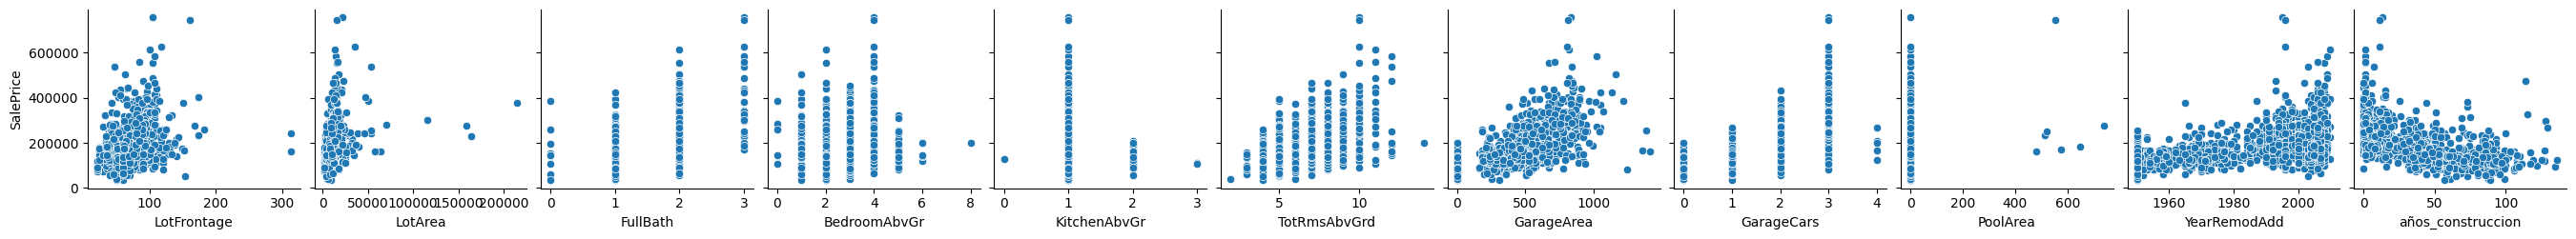

In [60]:
sns.pairplot( data = df , y_vars ='SalePrice', x_vars = x_num) 

### Utilizamos el método train_test_split para separar el dataset en datos de entrenamiento, prueba y validación.

In [61]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state= 123)

### Creamos el modelo

En esta parte del código, realizaremos los siguientes procesos.

* Transformaremos las variables categoricas con OneHotEncoder
* Completaremos los valores faltantes de las variables numericas con SimpleImputer
* Crearemos y ajustaremos un modelo de RandomForestRegressor con 9 arboles que se ajustara a los datos  para realizar las predicciones 

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.impute import  SimpleImputer

#modelo inicial 
vars_cat = x_cat
vars_num = x_num

cat_transfor = Pipeline( steps= [ ('OneHotEncoder',OneHotEncoder(handle_unknown = 'ignore'))])
num_transfor = Pipeline( steps= [ ('SimpleImputer', SimpleImputer(strategy =  'mean'))])


preporcessor  = ColumnTransformer( transformers= [('cat',cat_transfor,vars_cat),
                                                  ('num',num_transfor,vars_num)])

modelo = Pipeline( steps= [('pre_procesor',preporcessor)  , ('modelo',RandomForestRegressor(random_state=123,max_depth=9))])

In [63]:
vars_cat

['Street', 'Utilities', 'LotConfig']

In [64]:
vars_num

['LotFrontage',
 'LotArea',
 'FullBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'GarageCars',
 'PoolArea',
 'YearRemodAdd',
 'años_construccion']

### Entrenamos o ajustamos el modelo con los datos.

In [65]:
modelo.fit(x_train,y_train)

Pipeline(steps=[('pre_procesor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Street', 'Utilities',
                                                   'LotConfig']),
                                                 ('num',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'FullBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'GarageArea',
                                                   'GarageCars', 'PoolArea',
                                                   'YearRemodAdd',
                                                   'años_construccion'])])),
                ('modelo',
                 RandomForestRegressor(max_depth=9, random_state=123))])

### Realizamos las predicciones.

In [66]:
preds = modelo.predict(x_test)

### Evaluamos el rendimiento del modelo con las siguientes métricas.


* RMSE: Proporciona una medida de error en las mismas unidades que la variable dependiente, pero la magnitud de los errores grandes tiene un mayor impacto en la métrica. Es útil cuando deseas evaluar cómo el modelo se desempeña en presencia de errores grandes.
* MAE:Proporciona una medida de error en las mismas unidades que la variable dependiente, Proporciona una visión general del error promedio en términos absoluto.
* MAPE mide el error absoluto en términos porcentuales. Calcula el promedio de las diferencias absolutas entre los valores reales y los valores predichos.
* R² es una métrica que indica qué proporción de la variabilidad en la variable dependiente es explicada por el modelo.

In [67]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error


mean_squared_error(y_test, preds)

print('mean_absolute_error:            ',mean_absolute_error(y_test,preds))
print('mean_absolute_percentage_error: ',mean_absolute_percentage_error(y_test,preds))
print('r2_score:                       ',r2_score(y_test,preds))
print('RMSE:                           ', np.sqrt(mean_squared_error(y_test, preds)))

mean_absolute_error:             26082.25833377182
mean_absolute_percentage_error:  0.14822036751916073
r2_score:                        0.7696051090824293
RMSE:                            37732.63468684523


### Realizamos validación cruzada para evaluar el rendimiento del modelo y asegurar que sea generalizable a datos no vistos.

In [68]:

from sklearn.model_selection import cross_validate,KFold

kfold = KFold(n_splits=5)

cv = cross_validate(modelo, x_train,y_train ,cv = kfold,scoring='neg_mean_absolute_error',return_train_score=True)

Visualizamos los resultados de la validación cruzada.

In [69]:

print('TEST')
print('Validacion crusada test:',cv['test_score']*-1)
print('Media:',np.mean(cv['test_score']*-1))
print()
print('TRAIN')
print('Validacion crusada train:',cv['train_score']*-1)
print('Media:',np.mean(cv['train_score']*-1))

TEST
Validacion crusada test: [25952.09653957 27104.4163715  28286.4053306  26077.49832702
 25568.09841747]
Media: 26597.702997233624

TRAIN
Validacion crusada train: [15035.65946259 14742.02224389 14688.04007294 15086.3632015
 15238.8276363 ]
Media: 14958.182523441796


En la siguiente gráfica se evidencia que el modelo no se ajusta correctamente a los datos. Esto nos indica que debemos ajustar y optimizar el conjunto de hiperparámetros del modelo.

Si tenemos en cuenta los valores del RMSE, MAE, MAPE y R² calculados anteriormente y los comparamos con la gráfica del entrenamiento y la prueba que realizamos con los valores calculados en la validación cruzada, podemos identificar si el modelo presenta sesgo (bias) o sobreajuste (overfitting).

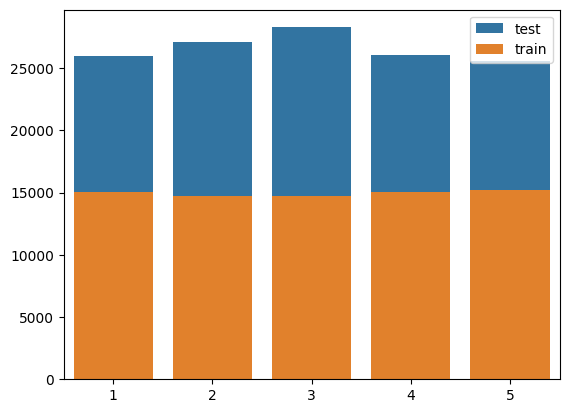

In [70]:

test_core = cv['test_score']*-1
train_score = cv['train_score']*-1


sns.barplot(x = np.arange(1,6), y = test_core , label = 'test')
sns.barplot(x = np.arange(1,6), y = train_score , label = 'train')
plt.show()

In [71]:
y_test_1d = y_test.values.ravel()
y_test_1d

array([222500,  87000, 130000, 274300, 140000, 259000, 309000, 127500,
       155000, 147000, 159000, 220000, 140000, 108000, 260000, 207500,
       115000, 325624, 212000, 167900, 151000, 162900, 109500, 143000,
       230000, 145000, 208900, 181000, 129900, 107000, 149350, 182000,
       143000, 198900, 367294, 190000, 173000, 475000, 176500, 101000,
       144000, 174000, 215000, 165000, 215000, 135750, 311872, 248000,
       239900, 116000, 200000, 196000, 140000, 143000,  89500, 153000,
       144000, 168000, 228000, 360000, 108000, 345000, 122000, 167000,
       244000, 140000, 120000, 279500, 232600, 140000, 135000, 129000,
       171900, 250000, 169500, 140000, 183200, 140000, 210000, 133000,
       313000, 284000,  85500, 125000, 168000, 140000,  98000, 129000,
        52500, 302000, 127500, 181000, 178000, 163000, 153337, 119500,
       244400, 109500, 219210, 133500, 104900, 582933, 342643, 148000,
       207500, 115000, 129000, 190000, 177500, 318000, 280000, 242000,
      

### Graficamos los datos del modelo ajustado y la línea del modelo ideal para verificar gráficamente qué tan ajustadas están las predicciones del modelo.

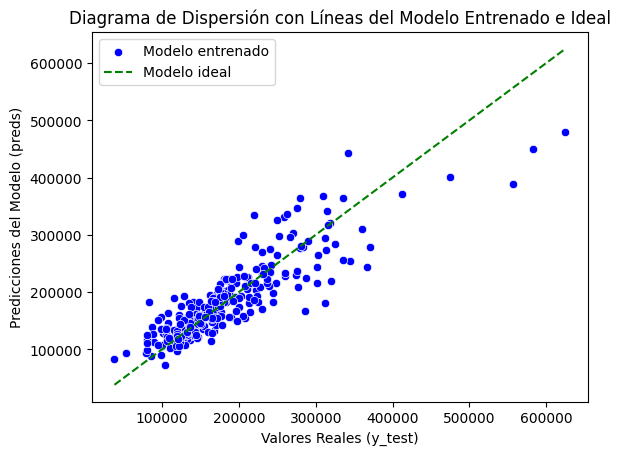

In [72]:

# Diagrama de dispersión
sns.scatterplot(x=y_test_1d, y=preds,  color='blue', label='Modelo entrenado')

# Opcional: agregar la línea ideal (y = x) para comparación
sns.lineplot(x=y_test_1d, y=y_test_1d, color='green', label='Modelo ideal', linestyle='--')

plt.title('Diagrama de Dispersión con Líneas del Modelo Entrenado e Ideal')
plt.legend()

# Nombrar los ejes
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones del Modelo (preds)')


# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### Realizamos la optimización de los hiperparámetros para el modelo.

In [73]:
#optimizar modelo con optuna
import optuna

def objetivo(trial):

    # DEFINIMOS UNIVERSO DE HIPER PARAMETROS 
    n_estimators = trial.suggest_int('n_estimators',1,5000,10)
    max_depth = trial.suggest_int('max_depth',2,1000)
    min_samples_split = trial.suggest_int('min_samples_split',2,100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,100)

    params = { 'n_estimators':n_estimators,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf

    }

    vars_cat = x_cat
    vars_num = x_num

    cat_transfor = Pipeline( steps= [ ('OneHotEncoder',OneHotEncoder(handle_unknown = 'ignore'))])
    num_transfor = Pipeline( steps= [ ('SimpleImputer', SimpleImputer(strategy =  'mean'))])


    preporcessor  = ColumnTransformer( transformers= [('cat',cat_transfor,vars_cat),
                                                    ('num',num_transfor,vars_num)])
    
    
    modelo = Pipeline(steps=[('pre_procesor',preporcessor)  ,  ('modelo',RandomForestRegressor(random_state=123,**params))])

    # CREAMOS LA VALIDACION CRUSADA
    kfold = KFold(n_splits=5)
    cv = cross_validate(modelo,x_train,y_train, cv = kfold , scoring='neg_mean_absolute_error', return_train_score = True)

    #DEVOLVEMOS LOS PARAMETROS CON LOS QUE SE VA A AJUSTAR EL MODELO
    mean = np.mean(cv['test_score']*-1)
    std = np.std(cv['test_score']*-1)

    suma = mean + std

    return suma


In [74]:
study = optuna.create_study(direction='minimize')
study.optimize(objetivo,n_trials = 10)

[I 2024-09-05 12:11:27,933] A new study created in memory with name: no-name-f184d9ee-ad17-4c9d-8051-bbefed5d84b4
[I 2024-09-05 12:11:47,879] Trial 0 finished with value: 34369.83758131808 and parameters: {'n_estimators': 1651, 'max_depth': 956, 'min_samples_split': 17, 'min_samples_leaf': 69}. Best is trial 0 with value: 34369.83758131808.
[I 2024-09-05 12:12:07,599] Trial 1 finished with value: 33628.8125934841 and parameters: {'n_estimators': 1561, 'max_depth': 805, 'min_samples_split': 100, 'min_samples_leaf': 27}. Best is trial 1 with value: 33628.8125934841.
[I 2024-09-05 12:12:54,049] Trial 2 finished with value: 34357.857879593175 and parameters: {'n_estimators': 4061, 'max_depth': 384, 'min_samples_split': 24, 'min_samples_leaf': 69}. Best is trial 1 with value: 33628.8125934841.
[I 2024-09-05 12:13:25,186] Trial 3 finished with value: 30739.658809101405 and parameters: {'n_estimators': 2051, 'max_depth': 876, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 3 w

Pedimos los mejores hiperparametros.

In [75]:
study.best_params

{'n_estimators': 2051,
 'max_depth': 876,
 'min_samples_split': 12,
 'min_samples_leaf': 19}

In [76]:
study.best_trial

FrozenTrial(number=3, state=1, values=[30739.658809101405], datetime_start=datetime.datetime(2024, 9, 5, 12, 12, 54, 50585), datetime_complete=datetime.datetime(2024, 9, 5, 12, 13, 25, 186452), params={'n_estimators': 2051, 'max_depth': 876, 'min_samples_split': 12, 'min_samples_leaf': 19}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=4991, log=False, low=1, step=10), 'max_depth': IntDistribution(high=1000, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=100, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=100, log=False, low=1, step=1)}, trial_id=3, value=None)

Implementamos los hiperparámetros optimizados en el modelo.

In [77]:
from sklearn.feature_selection import SelectKBest,f_regression

#nuevo modelo
params = {'n_estimators': 2481,
 'max_depth': 366,
 'min_samples_split': 35,
 'min_samples_leaf': 9}

# CREAMOS MODELO
#modelo inicial 
vars_cat = x_cat
vars_num = x_num

cat_transfor = Pipeline( steps= [ ('OneHotEncoder',OneHotEncoder(handle_unknown = 'ignore'))])
num_transfor = Pipeline( steps= [ ('SimpleImputer', SimpleImputer(strategy =  'mean'))])


preporcessor  = ColumnTransformer( transformers= [('cat',cat_transfor,vars_cat),
                                                ('num',num_transfor,vars_num)])

Best_selection = Pipeline(steps=[('SelectKBest',SelectKBest(score_func = f_regression , k = 10 ))])


modelo_optimizado = Pipeline(steps=[('pre_procesor',preporcessor)  , ('Best_selection',Best_selection) , ('modelo',RandomForestRegressor(random_state=123,**params))])

In [78]:
modelo_optimizado.fit(x_train,y_train)

Pipeline(steps=[('pre_procesor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Street', 'Utilities',
                                                   'LotConfig']),
                                                 ('num',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'FullBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'GarageArea',
                                                   'GarageCars', 'PoolArea',
                                                   'YearRemodAdd',
                                                   'años_construccion'])])),
                ('Best_selection',
                 Pipeline(steps=[('SelectKBest',
                                  SelectKBest(score_func=<function f_regression at 0x000002B735278680>))])),
                ('modelo',
                 RandomForestRegressor(max_depth=366, min_samples_leaf=9,
                                       min_samples_split=35, n_estimators=2481,
                                       random_state=123))])

In [79]:

kfold_2 = KFold(n_splits=5)

cv_2 = cross_validate(modelo_optimizado, x_train,y_train ,cv = kfold_2,scoring='neg_mean_absolute_error',return_train_score=True)

In [80]:

print('TEST')
print('Validacion crusada test:',cv_2['test_score']*-1)
print('Media:',np.mean(cv_2['test_score']*-1))
print()
print('TRAIN')
print('Validacion crusada train:',cv_2['train_score']*-1)
print('Media:',np.mean(cv_2['train_score']*-1))

TEST
Validacion crusada test: [27646.67609469 28678.3931434  29625.57808006 28376.71298313
 26680.93494394]
Media: 28201.65904904502

TRAIN
Validacion crusada train: [24074.33623693 24429.81371719 23745.2290309  24289.43876448
 24151.18444714]
Media: 24138.000439329953


Evidenciamos que el modelo con los nuevos hiperparámetros optimizados se ajusta mejor a los datos.

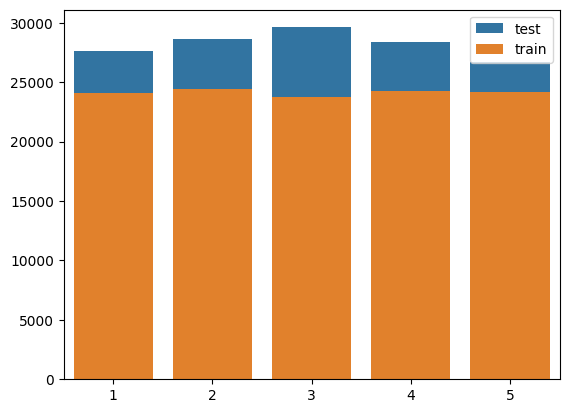

In [81]:
test_core_optimizado = cv_2['test_score']*-1
train_score_optimizado = cv_2['train_score']*-1


sns.barplot(x = np.arange(1,6), y = test_core_optimizado , label = 'test')
sns.barplot(x = np.arange(1,6), y = train_score_optimizado , label = 'train')
plt.show()

In [82]:
preds_optimizado = modelo_optimizado.predict(x_test)

Verificamos nuevamente el scoring del modelo.

In [83]:
mean_squared_error(y_test, preds)

print('mean_absolute_error:            ',mean_absolute_error(y_test,preds_optimizado))
print('mean_absolute_percentage_error: ',mean_absolute_percentage_error(y_test,preds_optimizado))
print('r2_score:                       ',r2_score(y_test,preds_optimizado))
print('RMSE:                           ', np.sqrt(mean_squared_error(y_test, preds_optimizado)))

mean_absolute_error:             27452.254491387594
mean_absolute_percentage_error:  0.1552861152145748
r2_score:                        0.7290253394410369
RMSE:                            40920.88797887781


Verificamos de forma gráfica cuáles son las variables que más importancia tienen para el modelo.

<Axes: xlabel='importance', ylabel='None'>

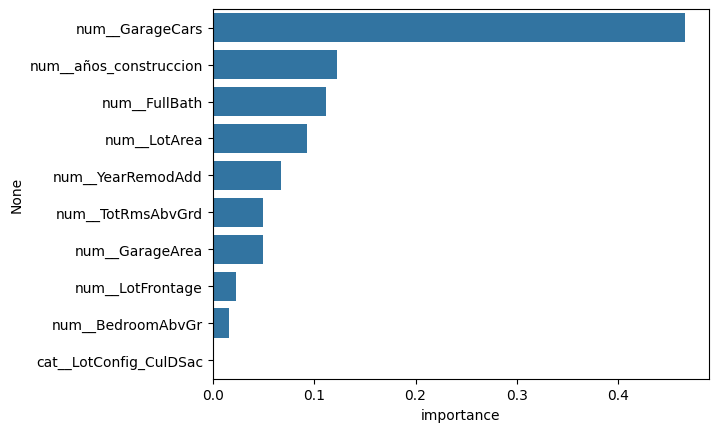

In [84]:
# Obtener las características transformadas del preprocesador
feature_names = modelo_optimizado.named_steps['pre_procesor'].get_feature_names_out()

# Obtener los índices de las características seleccionadas por SelectKBest
selected_features_indices = modelo_optimizado.named_steps['Best_selection'].named_steps['SelectKBest'].get_support(indices=True)

# Filtrar los nombres de las características seleccionadas
selected_features = feature_names[selected_features_indices]

# Crear el DataFrame con las importancias usando los nombres correctos
importancias = pd.DataFrame(
    modelo_optimizado.named_steps['modelo'].feature_importances_, 
    columns=['importance'], 
    index=selected_features
).sort_values(by='importance', ascending=False)

sns.barplot(importancias, x = 'importance', y = importancias.index)



Podemos visualizar en un DataFrame de Pandas los valores reales y las predicciones del modelo.

In [88]:
df_salida = y_test.copy()
df_salida['preds'] = preds_optimizado
df_salida

,SalePrice,pred
147,222500,200843.188712
676,87000,181837.127335
1304,130000,164617.838187
1372,274300,229793.950993
1427,140000,131566.690231
...,...,...
1012,165000,131520.388268
1059,220000,153870.317637
890,122900,136305.076120
628,135000,164919.550703


In [85]:
''' 
import pickle

with open( 'modelo_optimizado.pickle', 'wb' ) as hamdle:
    pickle.dump(modelo_optimizado,hamdle)

'''    


" \nimport pickle\n\nwith open( 'modelo_optimizado.pickle', 'wb' ) as hamdle:\n    pickle.dump(modelo_optimizado,hamdle)\n\n"